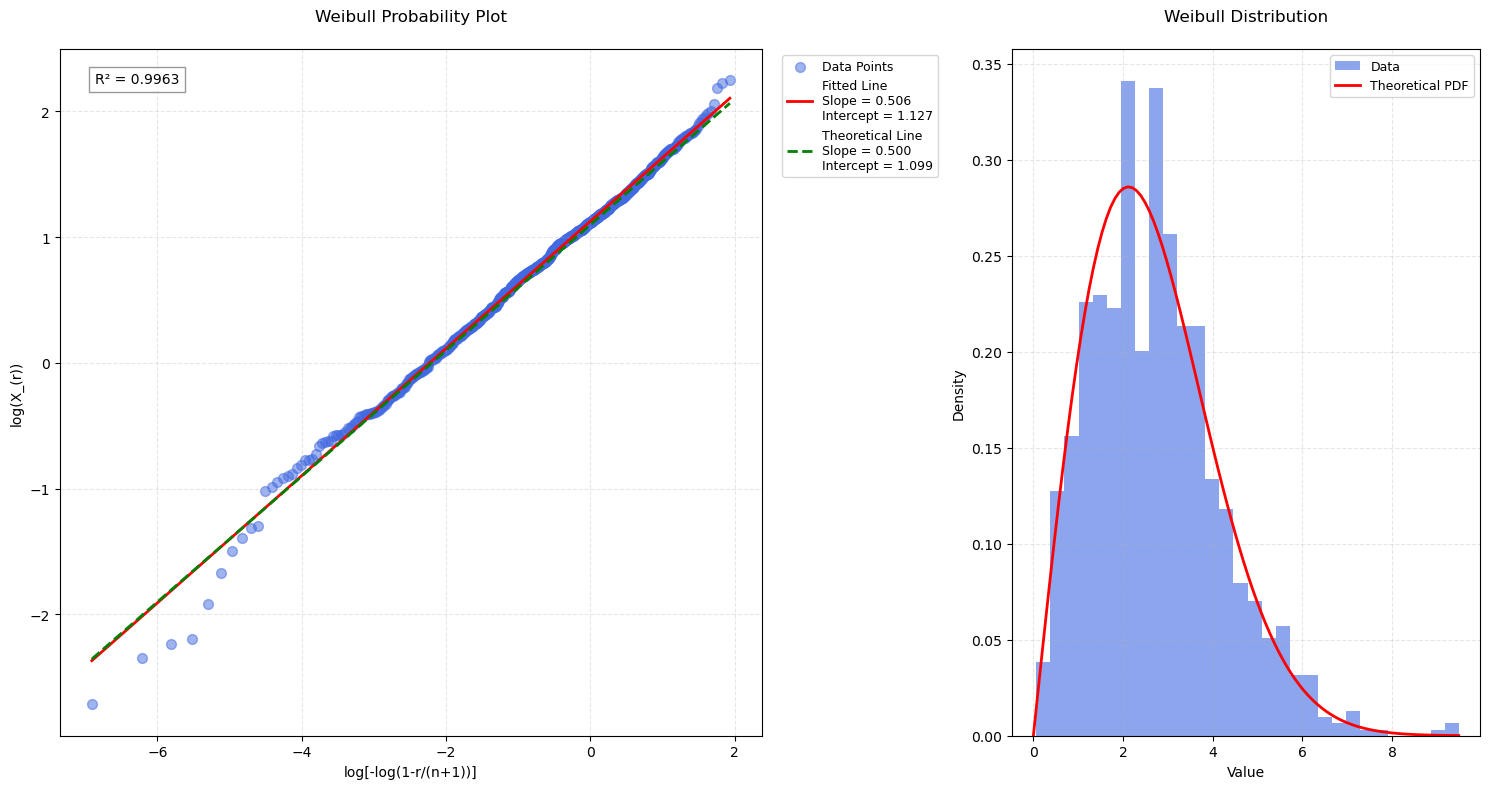


Results:
Theoretical slope (1/α): 0.500
Fitted slope: 0.506
Theoretical intercept (log(λ)): 1.099
Fitted intercept: 1.127
R-squared: 0.9963


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import weibull_min

def generate_weibull_data(alpha, lambda_, size=100):
    """Generate Weibull distributed data."""
    return lambda_ * np.random.weibull(alpha, size)

def create_improved_weibull_plots(data, alpha, lambda_):
    """Create improved Weibull probability plot with distribution."""
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1])
    
    # Probability Plot (Left subplot)
    ax1 = fig.add_subplot(gs[0])
    
    # Sort the data and calculate plotting positions
    x = np.sort(data)
    n = len(x)
    r = np.arange(1, n + 1)
    pos = r / (n + 1)
    
    # Transform axes
    y = np.log(x)
    x_plot = np.log(-np.log(1 - pos))
    
    # Scatter plot with improved styling
    ax1.scatter(x_plot, y, alpha=0.5, color='royalblue', 
               label='Data Points', s=50)
    
    # Fit a line
    slope, intercept, r_value, _, _ = stats.linregress(x_plot, y)
    
    # Create theoretical line
    x_line = np.linspace(min(x_plot), max(x_plot), 100)
    y_line = slope * x_line + intercept
    ax1.plot(x_line, y_line, 'r-', linewidth=2, 
            label=f'Fitted Line\nSlope = {slope:.3f}\nIntercept = {intercept:.3f}')
    
    # Add theoretical values
    theoretical_slope = 1/alpha
    theoretical_intercept = np.log(lambda_)
    y_theoretical = theoretical_slope * x_line + theoretical_intercept
    ax1.plot(x_line, y_theoretical, 'g--', linewidth=2,
             label=f'Theoretical Line\nSlope = {theoretical_slope:.3f}\nIntercept = {theoretical_intercept:.3f}')
    
    # Customize probability plot
    ax1.set_title('Weibull Probability Plot', fontsize=12, pad=20)
    ax1.set_xlabel('log[-log(1-r/(n+1))]', fontsize=10)
    ax1.set_ylabel('log(X_(r))', fontsize=10)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.legend(fontsize=9, bbox_to_anchor=(1.02, 1))
    
    # Display R-squared value
    ax1.text(0.05, 0.95, f'R² = {r_value**2:.4f}', 
             transform=ax1.transAxes, 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    
    # Distribution Plot (Right subplot)
    ax2 = fig.add_subplot(gs[1])
    
    # Plot histogram of data
    counts, bins, _ = ax2.hist(data, bins=30, density=True, alpha=0.6, 
                              color='royalblue', label='Data')
    
    # Plot theoretical Weibull PDF
    x_pdf = np.linspace(0, max(data), 100)
    pdf = weibull_min.pdf(x_pdf, alpha, loc=0, scale=lambda_)
    ax2.plot(x_pdf, pdf, 'r-', linewidth=2, label='Theoretical PDF')
    
    # Customize distribution plot
    ax2.set_title('Weibull Distribution', fontsize=12, pad=20)
    ax2.set_xlabel('Value', fontsize=10)
    ax2.set_ylabel('Density', fontsize=10)
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.legend(fontsize=9)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    return slope, intercept, r_value**2

# Example usage
# Set parameters
alpha = 2.0  # shape parameter
lambda_ = 3.0  # scale parameter
n_samples = 1000

# Generate data
data = generate_weibull_data(alpha, lambda_, n_samples)

# Create probability plot
slope, intercept, r_squared = create_improved_weibull_plots(data, alpha, lambda_)

# Print results
print(f"\nResults:")
print(f"Theoretical slope (1/α): {1/alpha:.3f}")
print(f"Fitted slope: {slope:.3f}")
print(f"Theoretical intercept (log(λ)): {np.log(lambda_):.3f}")
print(f"Fitted intercept: {intercept:.3f}")
print(f"R-squared: {r_squared:.4f}")